HW 1 - Problem 6a 



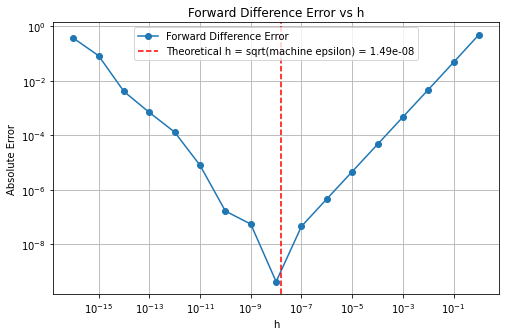

The total error in the forward difference approximation comes from truncation error, which grows with step size h. And it comes from round-off error, which grows with 1/h as gets very small (catastrophic cancellation).Balancing these errors gives the optimal step size -  which can be represented as the square root of machine epsilon. 
 
Minimum error: 4.3610515199077327e-10
Occurs at h = 1e-08
Theoretical optimal h = sqrt(machine epsilon) = 1.4901161193847656e-08


The computed h=1e-08 is very close to the theoretical rule of thumb for h approximating to the squareroot of machine epsilon (which is roughly equal to 1.49e-08). This confirms that the minimum total erroroccurs near the expected balance between truncation and round off error.


In [1]:

'''
HW 1 - Problem 6a
To be noted : The default float type is IEEE 754 double precision in python so no need to change anything.
'''
print("HW 1 - Problem 6a \n")
#Imported libraries to run code
import numpy as np
import matplotlib.pyplot as plt
import sys
import matplotlib.ticker as mticker


'''
Global Variables -
f: Function we are attempting to differentiate -> sin(x)
f_deriv : Derivative of f -> cos(x)
x : Origin point to test function from
k : Order of magnitude for h
h_values : Step size for incrementing 
'''
f = np.sin
f_derivative = np.cos
x = 1.2 
k = np.arange(0,17)
h_values = 10.0**(-k)

'''
Main Loop - 
Summary : Loops through the step sizes and applies each to the forward difference formula attempting
to approximate the derivative of sin(x). With each iteration we collect the aboslute error of the new value minus
the actual. 
errors : list of absolute error from difference in forward diff formula and cos(x)
'''
errors = []
for h in h_values:
    f_new = (f(x + h) - f(x)) / h
    error = abs(f_new - f_derivative(x))
    errors.append(error)

#Turning the errors list into a numpy array 
errors = np.array(errors)

#Plotting of the aboslute error with each step of h as well as the square root of the machine epsilon
plt.figure(figsize=(8,5))
plt.loglog(h_values, errors, marker='o', label='Forward Difference Error')

eps_mach = sys.float_info.epsilon
h_opt_theory = eps_mach**0.5
plt.axvline(x=h_opt_theory, color='r', linestyle='--', label=f'Theoretical h = sqrt(machine epsilon) = {h_opt_theory:.2e}')

plt.xlabel('h')
plt.ylabel('Absolute Error')
plt.title('Forward Difference Error vs h')
plt.legend()
plt.grid()
plt.show()


print("The total error in the forward difference approximation comes from truncation error, which grows with "
"step size h. And it comes from round-off error, which grows with 1/h as gets very small (catastrophic cancellation)."
"Balancing these errors gives the optimal step size -  which can be represented as the square root of machine epsilon. \n ")

min_error, optimal_h = min(zip(errors, h_values))
print(f"Minimum error: {min_error}")
print(f"Occurs at h = {optimal_h}")


print(f"Theoretical optimal h = sqrt(machine epsilon) = {h_opt_theory}")
print('\n')
print("The computed h=1e-08 is very close to the theoretical rule of thumb for h approximating to the square" 
"root of machine epsilon (which is roughly equal to 1.49e-08). This confirms that the minimum total error" 
"occurs near the expected balance between truncation and round off error.")


HW 1 - Problem 6b 

Double precision: optimal h = 1e-05 , theoretical rule of thumb h ~ 6.055454452393343e-06
Single precision: optimal h = 0.01 , theoretical rule of thumb h ~ 0.00492156660115185


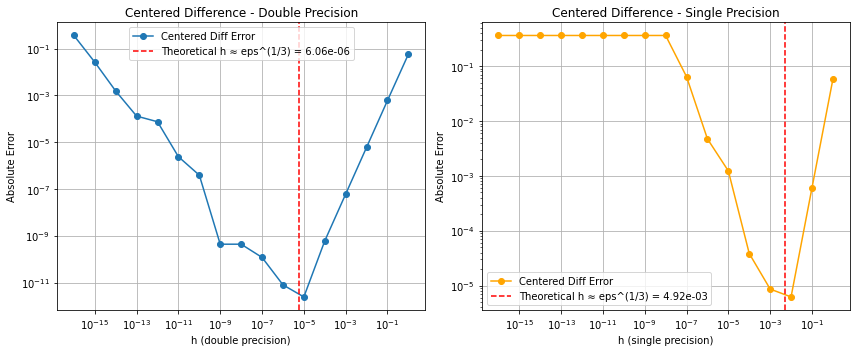

Results show that the optimal step size for minimizing the difference error is close to the theoretical rule of thumb for both precisions. For double precision, the optimal h=1e-5 is slightly larger than thetheoretical 6.06e-6. While for single precision the optimal h= 0.01, which is slightly larger than the theoretical 0.00492. In both cases, the actual optimal h is of the same order of magnitude as the predicted value  -  confirming that the theoretical guideline gives a good estimate.


In [4]:
'''
HW 1 - Problem 6b
'''
print("HW 1 - Problem 6b \n")


'''
Double Precision Main Loop - 
Summary : Loops through the step sizes and applies each to the centered difference formula attempting
to approximate the derivative of sin(x). With each iteration we collect the aboslute error of the new value minus
the actual. 
errors_double : list of absolute error from difference in centererd diff formula and cos(x) 
'''
errors_double = []
for h in h_values:
    f_new = (f(x + h) - f(x - h)) / (2 * h)
    error = abs(f_new - f_derivative(x))
    errors_double.append(error)

#Turning the errors list into a numpy array 
errors_double = np.array(errors_double)

'''
Global Variables -
x_single : Changing the double precision x-value into single precision.
f_single : Instantiating a single precision function for sin(x).
f_derivative_single : Changing the double precision result of cos(1.2) into a single precision result.
'''
x_single = np.float32(x)
f_single = lambda x: np.float32(np.sin(x))
f_derivative_single = np.float32(np.cos(x))

'''
Single Precision Main Loop - 
Summary : Loops through the step sizes and applies each to the centered difference formula attempting
to approximate the derivative of sin(x). With each iteration we collect the aboslute error of the new value minus
the actual. 
errors_single : list of absolute error from difference in centererd diff formula and cos(x) 
'''
errors_single = []
for h in h_values:
    h_single = np.float32(h)
    f_new = (f_single(x_single + h_single) - f_single(x_single - h_single)) / (2 * h_single)
    error = abs(f_new - f_derivative_single)
    errors_single.append(error)

#Turning the errors list into a numpy array 
errors_single = np.array(errors_single)

#Finding the h value that minimizes the error for double and single precision
optimal_double = h_values[np.argmin(errors_double)]
optimal_single = h_values[np.argmin(errors_single)]

#Obtaining the machine epsilon value for double and single precision
eps_double = np.finfo(float).eps
eps_single = np.finfo(np.float32).eps

#Calculating the theoretical rule of thumb  for the centered differences formula
theoretical_double = eps_double**(1/3)
theoretical_single = eps_single**(1/3)

print("Double precision: optimal h =", optimal_double, ", theoretical rule of thumb h ~", theoretical_double)
print("Single precision: optimal h =", optimal_single, ", theoretical rule of thumb h ~", theoretical_single)

#log-log plots for showcasing absolute error versus h-value
#Graph size
plt.figure(figsize=(12,5))
#Double precision graph
plt.subplot(1,2,1)
plt.loglog(h_values, errors_double, marker='o', label='Centered Diff Error')
plt.axvline(x=theoretical_double, color='r', linestyle='--', label=f'Theoretical h ≈ eps^(1/3) = {theoretical_double:.2e}')
plt.xlabel('h (double precision)')
plt.ylabel('Absolute Error')
plt.title('Centered Difference - Double Precision')
plt.legend()
plt.grid()
#Single precision graph
plt.subplot(1,2,2)
plt.loglog(h_values, errors_single, marker='o', color='orange', label='Centered Diff Error')
plt.axvline(x=theoretical_single, color='r', linestyle='--', label=f'Theoretical h ≈ eps^(1/3) = {theoretical_single:.2e}')
plt.xlabel('h (single precision)')
plt.ylabel('Absolute Error')
plt.title('Centered Difference - Single Precision')
plt.legend()
plt.grid()


plt.tight_layout()
plt.show()


print("Results show that the optimal step size for minimizing the difference error is close to the theoretical "
      "rule of thumb for both precisions. For double precision, the optimal h=1e-5 is slightly larger than the"
      "theoretical 6.06e-6. While for single precision the optimal h= 0.01, which is slightly larger than the "
      "theoretical 0.00492. In both cases, the actual optimal h is of the same order of magnitude as the "
      "predicted value  -  confirming that the theoretical guideline gives a good estimate.")

In [14]:
'''
HW 1 - Problem 7b
'''
print("HW 1 - Problem 7b \n")

#Importing necessary packages to run script
import numpy as np

#Coefficients list where each element contains the necessary coeffs for computing roots
coefficients = [
    (1, 4, 3),
    (1e200, 4e200, 3e200),
    (0, 2, 8),
    (1, 1e8, 1),
    (1, -8, 15.9999999),
    (1e-200, -1e200, 1e-200)
]

'''
Main Function - 
Summary : Utilizes the standard quadratic equation to compute the roots with respect to the coefficients.
Params : a, b, and c - the three coefficients necessary to compute the quadratic equation. 
Output  : 2 roots returned as a tuple

'''
def quadratic_standard_np(a, b, c):
    #Cheking for where a=0. Because if a=0 then the quadratic formula reduces to -c/b -> effectively lowering the overall computational cost
    if a == 0:
        # If b is not equal to 0 then one root exist and its returned. Otherwise, no roots exist.
        if b != 0:
            return (-c / b, np.nan)
        else:
            return (np.nan, np.nan)  
    #Try-Except logic introduced so program would not fail when overflow occurs and crashes the program. 
    try:
        #Calculation of the determinant
        discriminant = b**2 - 4*a*c
        sqrt_disc = np.sqrt(discriminant)
        root1 = (-b + sqrt_disc) / (2*a)
        root2 = (-b - sqrt_disc) / (2*a)
        return (root1, root2)
    except OverflowError:

        return ("Overflow", "Overflow")

#Looping through the coefficient list and calling the quadratic_standard_np function on each triplet -> producing the results
print("a\tb\tc\tRoot1\tRoot2")
for a, b, c in coefficients:
    r1, r2 = quadratic_standard_np(a, b, c)
    print(f"{a}\t{b}\t{c}\t{r1}\t{r2}")





HW 1 - Problem 7b 

a	b	c	Root1	Root2
1	4	3	-1.0	-3.0
1e+200	4e+200	3e+200	Overflow	Overflow
0	2	8	-4.0	nan
1	100000000.0	1	-7.450580596923828e-09	-100000000.0
1	-8	15.9999999	4.0003162277650555	3.999683772234944
1e-200	-1e+200	1e-200	Overflow	Overflow


In [15]:
'''
HW 1 - Problem 7c
'''
print("HW 1 - Problem 7c \n")

#Coefficients list where each element contains the triplet of coeffs for computing each root individually
coefficients = [
    (1, 4, 3),
    (1e200, 4e200, 3e200),
    (0, 2, 8),
    (1, 1e8, 1),
    (1, -8, 15.9999999),
    (1e-200, -1e200, 1e-200)
]

'''
Main Function - 
Summary : Utilizes the standard quadratic equation and the alternative formula for optimal computation of the roots.
Params : a, b, and c - the three coefficients necessary to compute the roots. 
Output  : 2 roots returned as a tuple
'''
def quadratic_robust(a, b, c):
    #Cheking for where a=0. Because if a=0 then the quadratic formulas reduce to -c/b -> effectively lowering the overall computational cost
    if a == 0:
        #If b is not equal to 0 then one root exists and its returned. Otherwise, no roots exist
        if b != 0:
            return (-c / b, np.nan)
        else:
            return (np.nan, np.nan)  
    '''
    Dividing all coefficients by the largest one (the max scalar trick). This keeps the coefficients closer to 
    the same order of magnitude. Which in turn helps prevent overflow/underflow in intermediate steps 
    '''
    scale = max(abs(a), abs(b), abs(c))
    a_s = a / scale
    b_s = b / scale
    c_s = c / scale

    discriminant = b_s**2 - 4*a_s*c_s
    if discriminant < 0:
        return (np.nan, np.nan)  

    sqrt_disc = np.sqrt(discriminant)

    '''
    When |b| is very large, the discriminant b^2 - 4ac roughly equals b^2. 
    In this case, computing (-b +- sqrt(b^2 - 4ac)) / (2a) can cause catastrophic cancellation 
    because -b and +-sqrt(b^2 - 4ac) are nearly equal in magnitude. 
    To avoid this, we choose between the standard quadratic formula and its alternative form:
    - If b >= 0: use (-b - sqrt_disc) / (2a) for one root, and (2c) / (-b - sqrt_disc) for the other. 
    - If b < 0:  use (-b + sqrt_disc) / (2a) for one root, and (2c) / (-b + sqrt_disc) for the other. 
    This avoids subtracting nearly equal numbers and ensures better numerical stability.
    '''
    if b >= 0:
        root1 = (-b_s - sqrt_disc) / (2*a_s)
        root2 = (2*c_s) / (-b_s - sqrt_disc)
    else:
        root1 = (2*c_s) / (-b_s + sqrt_disc)
        root2 = (-b_s + sqrt_disc) / (2*a_s)


    return (root1, root2)

#Looping through the coefficient list and calling the quadratic_robust function on each triplet -> producing the results
print("a\tb\tc\tRoot1\tRoot2")
for a, b, c in coefficients:
    r1, r2 = quadratic_robust(a, b, c)
    print(f"{a}\t{b}\t{c}\t{r1}\t{r2}")


HW 1 - Problem 7c 

a	b	c	Root1	Root2
1	4	3	-3.0	-1.0
1e+200	4e+200	3e+200	-3.0	-1.0
0	2	8	-4.0	nan
1	100000000.0	1	-99999999.99999999	-1.0000000000000002e-08
1	-8	15.9999999	3.9996837722341114	4.000316227765889
1e-200	-1e+200	1e-200	0.0	inf


/tmp/ipykernel_1619/3355794431.py:59: RuntimeWarning: divide by zero encountered in scalar divide
  root2 = (-b_s + sqrt_disc) / (2*a_s)
